## Performing Exploratory Data Analysis (EDA)
### Here we will answer the question below:

1. The total no of titles in the dataset.
2. How many movies / tv shows are.
3. Percentage of movies / tv shows from the total number of titles.
4. Ratings by type (no of movies / tv show per rating type).
5. Titles by genre.
6. Titles by country.
7. Titles per duration (title per duration and type).
8. A timeline on how many titles netflix gathered from 2010 till now.get started

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [4]:
df= pd.read_csv(r"netflix_titles_cleaned_dataset.csv")

In [6]:
df.head()

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [8]:
# 1. Total no of titles
total_titles= df['show_id'].count()
print('Our dataset contains a total number of ' + total_titles.astype(str) + ' titles')

Our dataset contains a total number of 8807 titles


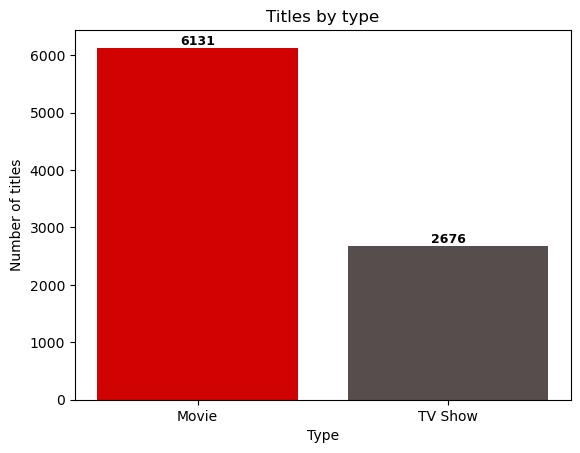

In [10]:
# 2.How many movies/ tv shows are?

df_type = pd.DataFrame(df.groupby('type')['show_id'].count()).reset_index()
df_type.columns = ['Type','Number of titles']

vals = pd.Series(df_type['Number of titles'].values)

colors=['#D00202', '#564d4d']
plt.bar(df_type['Type'],height = df_type['Number of titles'], color = colors)
plt.xlabel('Type')
plt.ylabel('Number of titles')
plt.title('Titles by type')

for index,value in enumerate(vals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize= 9, fontweight='semibold')
    
plt.show()

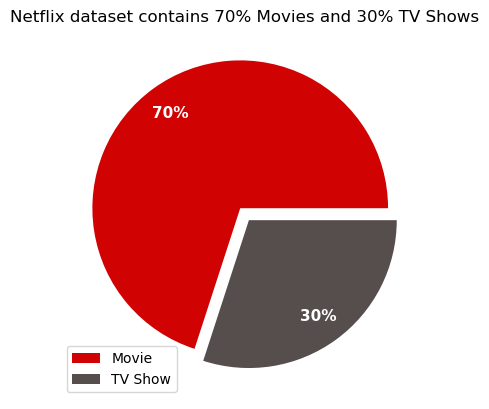

In [14]:
movies_percentage = ((df[df['type'] == 'Movie']['show_id'].count() 
                      / total_titles) * 100).round(0).astype(str)
tv_shows_percentage = ((df[df['type'] == 'TV Show']['show_id'].count() 
                        / total_titles) * 100).round(0).astype(str)

colors=['#D00202', '#564d4d']
slices = np.array([movies_percentage,tv_shows_percentage])
pie_labels=["Movie","TV Show"]
explode = (0.05, 0.05)
plt.pie(slices, labels=pie_labels , autopct='%1.0f%%', colors= colors, explode=explode, 
        pctdistance=0.80, textprops={'color': 'white',  'weight': 'bold', 'fontsize': 11})

#centre_circle = plt.Circle((0, 0), 0.70, fc='white')
#fig = plt.gcf()
#fig.gca().total_titles(centre_circle)

plt.legend(labels=pie_labels, loc='lower left')
plt.title('Netflix dataset contains ' +
          '%d' %movies_percentage.astype(float) + '% Movies and ' +
          '%d' %tv_shows_percentage.astype(float) + '% TV Shows')
plt.show()

In [18]:
#4. Ratings by type ( no of movies/tv shows per rating type)
#duc la data cleaning--pt verificare
df_titles_by_rating_and_type = pd.DataFrame(df.groupby(['rating','type'])['show_id'].count()) 
df_titles_by_rating_and_type

show_id
rating   type            
66 min   Movie          1
74 min   Movie          1
84 min   Movie          1
G        Movie         41
NC-17    Movie          3
NR       Movie         75
         TV Show        5
PG       Movie        287
         TV Show        1
PG-13    Movie        492
         TV Show        1
R        Movie        797
         TV Show        2
TV-14    Movie       1427
         TV Show      733
TV-G     Movie        126
         TV Show       94
TV-MA    Movie       2062
         TV Show     1145
TV-PG    Movie        540
         TV Show      323
TV-Y     Movie        131
         TV Show      176
TV-Y7    Movie        139
         TV Show      195
TV-Y7-FV Movie          5
         TV Show        1
UR       Movie          3

In [34]:
#5. Titles by genre (top 5)
df_movies_by_genre = pd.DataFrame(df.groupby('genre')['show_id'].count()).reset_index()
df_movies_by_genre.columns = ['genre','titles_number']
df_movies_by_genre = df_movies_by_genre.sort_values('titles_number',ascending=False).head(5)

df_movies_by_genre['color'] = df_movies_by_genre['titles_number'].apply(lambda x:'#564d4d' if x < 1000 else '#D00202')

df_movies_by_genre

,genre,titles_number,color
12,Dramas,1600,#D00202
7,Comedies,1210,#D00202
0,Action & Adventure,859,#564d4d
10,Documentaries,829,#564d4d
16,International TV Shows,774,#564d4d


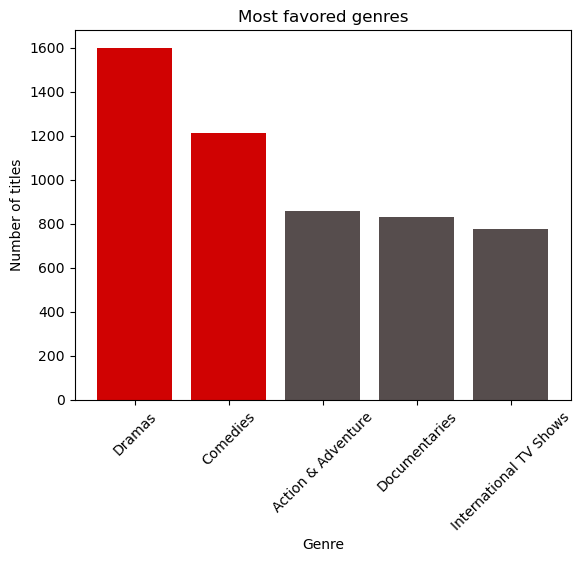

In [36]:
plt.bar(df_movies_by_genre['genre'],df_movies_by_genre['titles_number'], color = df_movies_by_genre['color'])
##plt.bar(df_movies_by_genre['genre'],df_movies_by_genre['titles_number'])
plt.xlabel('Genre')
plt.ylabel('Number of titles')
plt.title('Most favored genres')
plt.xticks(rotation = 45)
plt.show()

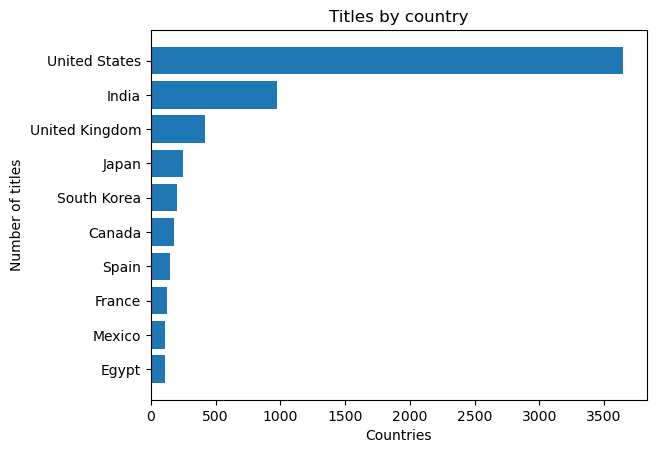

In [52]:
#6. Titles by country 

df_titles_by_country = df.groupby('country')['show_id'].count().reset_index()
df_titles_by_country.columns = ['country', 'title no']

#--keep the first value before the comma
#-- replace the comma 
# Extract the first value before the first comma

df_titles_by_country['country'] = df_titles_by_country['country'].str.split(',').str[-1]
df_titles_by_country = df_titles_by_country.sort_values(by='title no', ascending= False).head(10)
top_10_countries_desc = df_titles_by_country.sort_values(by='title no', ascending=True)

plt.barh(top_10_countries_desc['country'], top_10_countries_desc['title no'], color='#1f77b4')
plt.xlabel('Countries')
plt.ylabel('Number of titles')
plt.title('Titles by country')

plt.show()

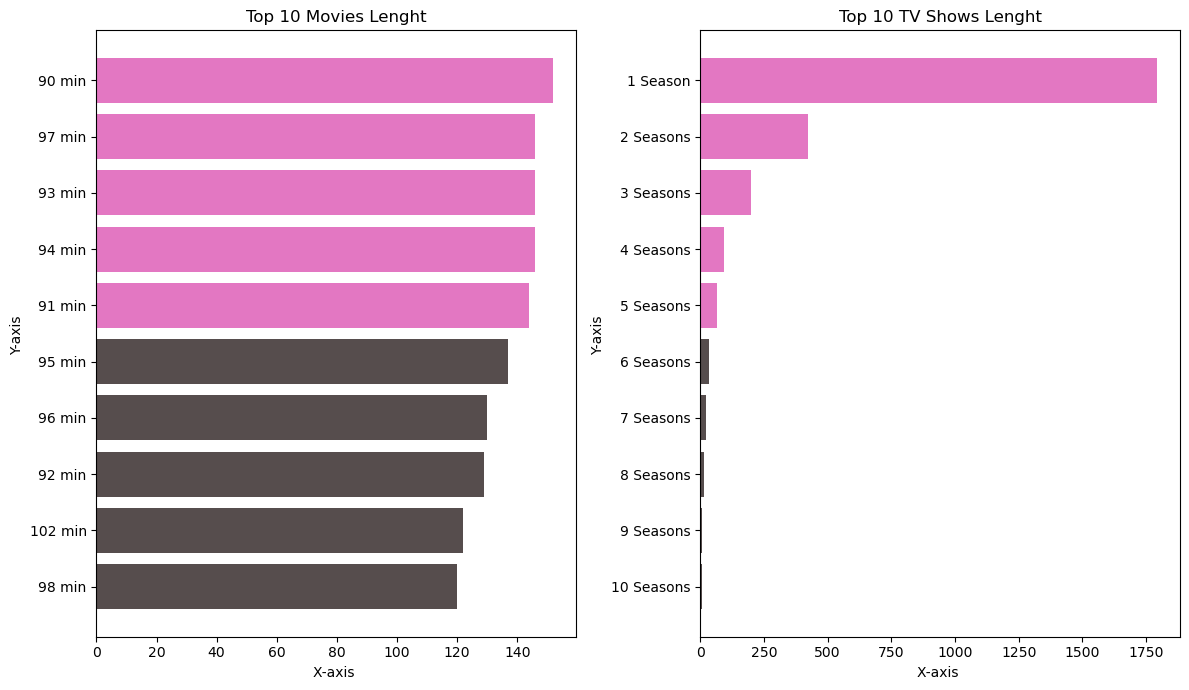

In [50]:
#7. Titles per duration (title per duration and type) 

df_titles_by_duration = pd.DataFrame(df.groupby(['type','duration'])['show_id'].count()).reset_index()
df_titles_by_duration.columns = ['type','duration','number of titles']
df_titles_by_duration

movies_data = df_titles_by_duration[df_titles_by_duration['type'] == 'Movie']
movies_data_sorted = movies_data.sort_values(by='number of titles', ascending= False).head(10)# de revenit cu sortarea
top_10_movies_desc = movies_data_sorted.sort_values(by='number of titles', ascending=True)

tv_shows_data = df_titles_by_duration[df_titles_by_duration['type']=='TV Show']
tv_show_data_sorted = tv_shows_data.sort_values(by='number of titles', ascending= False).head(10)
top_10_tv_show_desc = tv_show_data_sorted.sort_values(by='number of titles', ascending=True)

colors_movies = top_10_movies_desc['number of titles'].apply(lambda y: '#564d4d' if y < 140 else '#e377c2')
colors_tv_shows = top_10_tv_show_desc['number of titles'].apply(lambda y: '#564d4d' if y < 50 else '#e377c2')

plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.barh(top_10_movies_desc['duration'], top_10_movies_desc['number of titles'], color=colors_movies)
plt.title("Top 10 Movies Lenght")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.barh(top_10_tv_show_desc['duration'], top_10_tv_show_desc['number of titles'], color=colors_tv_shows)
plt.title("Top 10 TV Shows Lenght")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.tight_layout()
plt.show()

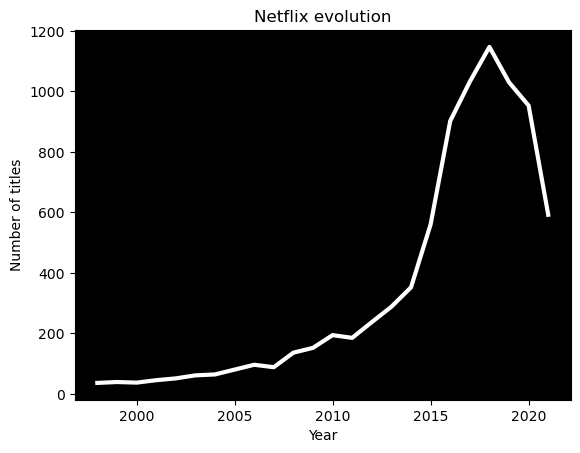

In [44]:
#8. A timeline on how many titles Netflix gathered from 2010 till now

df_titles_per_year = df.groupby('release_year')['show_id'].count().reset_index()
df_titles_per_year.columns = ['Year','Number of titles']

df_titles_after_1997 = df_titles_per_year[(df_titles_per_year['Year'] > 1997)]

plt.plot(df_titles_after_1997['Year'], df_titles_after_1997['Number of titles'], color='white',linewidth=3)
plt.xlabel('Year')

plt.ylabel('Number of titles')
plt.title('Netflix evolution')
plt.gca().set_facecolor('black')
plt.show()

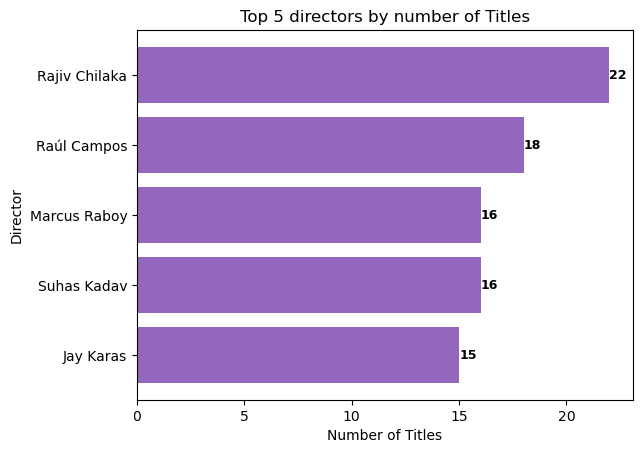

In [48]:
titles_per_director = df.groupby('director')['show_id'].count().astype(int).reset_index()
titles_per_director.columns = ['Director','Titles No']

director_titles = titles_per_director.sort_values(['Titles No','Director'], ascending=False).iloc[1:6]
director_titles = director_titles.sort_values('Titles No', ascending = True)
plt.barh(director_titles['Director'], director_titles['Titles No'], color = '#9467bd')
plt.title('Top 5 directors by number of Titles')
plt.ylabel('Director')
plt.xlabel('Number of Titles')


for index,value in enumerate(director_titles['Titles No']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize= 9, fontweight='semibold')

plt.show()